<a href="https://colab.research.google.com/github/adspacheco/cataract-detection-cnn/blob/main/cnn_catarata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Catarata com CNN

A catarata, uma opacidade da lente natural do olho, é a principal causa de cegueira evitável no mundo, afetando milhões de pessoas, especialmente em países em desenvolvimento.

O diagnóstico precoce e o tratamento adequado são cruciais para prevenir a perda de visão, mas o acesso a cuidados oftalmológicos ainda é um desafio em muitas regiões.

O tamanho das imagens nesse dataset é 416x416 pixels.

## Preparação dos dados e visualização

### Carregando os dados

In [1]:
!wget https://cdn3.gnarususercontent.com.br/3773-tensorflow-keras-imagens-redes-convolucionais/Projeto/catarata.zip

--2024-07-28 22:15:29--  https://cdn3.gnarususercontent.com.br/3773-tensorflow-keras-imagens-redes-convolucionais/Projeto/catarata.zip
Resolving cdn3.gnarususercontent.com.br (cdn3.gnarususercontent.com.br)... 172.67.75.65, 104.26.15.179, 104.26.14.179, ...
Connecting to cdn3.gnarususercontent.com.br (cdn3.gnarususercontent.com.br)|172.67.75.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19839561 (19M) [application/zip]
Saving to: ‘catarata.zip’

catarata.zip        100%[===================>]  18.92M  29.1MB/s    in 0.7s    

2024-07-28 22:15:31 (29.1 MB/s) - ‘catarata.zip’ saved [19839561/19839561]



In [2]:
%%capture
!unzip catarata.zip

In [3]:
url = '/content/catarata'

In [4]:
import pathlib

In [5]:
data_dir = pathlib.Path(url)

In [6]:
len(list(data_dir.glob('*/*.jpg')))

410

In [7]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['immature', 'mature']

In [8]:
import PIL

In [9]:
immature = list(data_dir.glob('immature/*'))

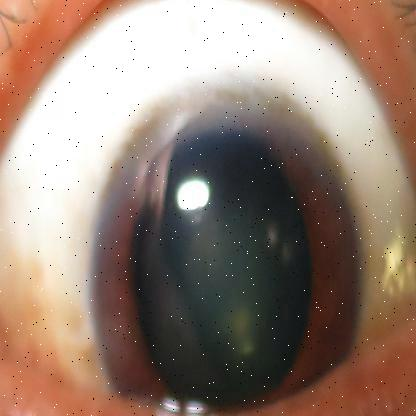

In [10]:
PIL.Image.open(str(immature[0]))

### Explorando e visualizando os dados

In [11]:
import numpy as np

In [12]:
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.jpg'))
    print(f"Classe '{subfolder}' tem {len(images)} imagens.")

    if images:
        img = PIL.Image.open(str(images[0]))
        img_array = np.array(img)
        print(f"Dimensões da primeira imagem em '{subfolder}': {img_array.shape}")

Classe 'immature' tem 214 imagens.
Dimensões da primeira imagem em 'immature': (416, 416, 3)
Classe 'mature' tem 196 imagens.
Dimensões da primeira imagem em 'mature': (416, 416, 3)


### Carregando os dados com Tensorflow

In [13]:
import tensorflow as tf

In [14]:
batch_size = 64
altura = 416
largura = 416

In [15]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 410 files belonging to 2 classes.
Using 328 files for training.


In [16]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 410 files belonging to 2 classes.
Using 82 files for validation.


In [17]:
treino.class_names

['immature', 'mature']

## Treinando a rede

### Perceptron de múltiplas camadas

#### Criando o modelo

In [18]:
tf.random.set_seed(424242)

In [19]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

#### Compilando o modelo

In [20]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Treinando o modelo

##### Configurando um acelerador

*   Edit -> Notebook Settings -> T4
*   Runtime -> Run all

In [21]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#### Treinamento do modelo

In [22]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
6/6 [==============================] - 4s 156ms/step - loss: 93.8108 - accuracy: 0.5823 - val_loss: 10.0857 - val_accuracy: 0.6829
Epoch 2/10
6/6 [==============================] - 1s 139ms/step - loss: 15.4186 - accuracy: 0.7073 - val_loss: 15.2632 - val_accuracy: 0.7073
Epoch 3/10
6/6 [==============================] - 1s 130ms/step - loss: 10.8240 - accuracy: 0.8079 - val_loss: 9.6449 - val_accuracy: 0.8171
Epoch 4/10
6/6 [==============================] - 1s 140ms/step - loss: 6.5979 - accuracy: 0.8567 - val_loss: 3.1770 - val_accuracy: 0.9146
Epoch 5/10
6/6 [==============================] - 1s 132ms/step - loss: 2.2340 - accuracy: 0.9299 - val_loss: 1.8350 - val_accuracy: 0.8902
Epoch 6/10
6/6 [==============================] - 1s 141ms/step - loss: 0.8001 - accuracy: 0.9451 - val_loss: 0.8496 - val_accuracy: 0.8780
Epoch 7/10
6/6 [==============================] - 1s 174ms/step - loss: 0.2856 - accuracy: 0.9756 - val_loss: 2.4924 - val_accuracy: 0.8537
Epoch 8/10
6/6 

#### Resumo do modelo

In [23]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 416, 416, 3)       0         
                                                                 
 flatten (Flatten)           (None, 519168)            0         
                                                                 
 dense (Dense)               (None, 128)               66453632  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66453761 (253.50 MB)
Trainable params: 66453761 (253.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Verificando os resultados

In [24]:
import matplotlib.pyplot as plt

#### Função plot treinamento

In [25]:
def plota_resultados(history,epocas):
  # Recebendo os dados
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)

  # Construindo a Figura
  plt.figure(figsize=(12, 6))

  # Plotando a Acurácia
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')

  # Plotando a Loss
  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

#### Plotando os resultados

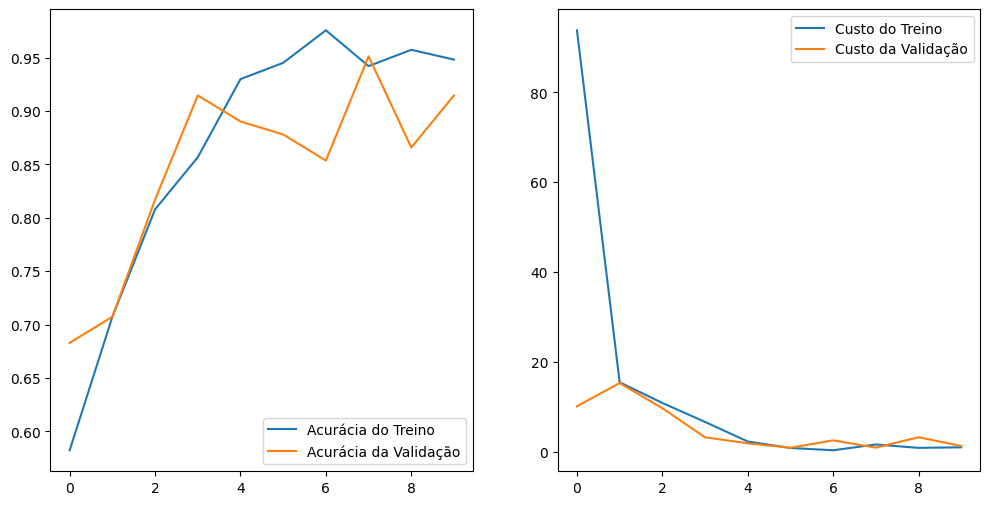

In [26]:
plota_resultados(history,epocas)

## Rede com camadas convolucionais

### Estruturando rede com camadas convolucionais

#### Criando o modelo

In [27]:
modelo2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

#### Compilando o modelo

In [28]:
modelo2.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

#### Estrutura do Modelo

In [29]:
modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 416, 416, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 414, 414, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 207, 207, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 205, 205, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 102, 102, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 332928)           

#### Treinando o Modelo

In [30]:
epocas = 10

history2 = modelo2.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
6/6 [==============================] - 12s 624ms/step - loss: 8.0042 - accuracy: 0.4970 - val_loss: 1.2201 - val_accuracy: 0.4756
Epoch 2/10
6/6 [==============================] - 2s 321ms/step - loss: 0.7481 - accuracy: 0.5915 - val_loss: 0.6804 - val_accuracy: 0.5244
Epoch 3/10
6/6 [==============================] - 2s 246ms/step - loss: 0.6004 - accuracy: 0.6585 - val_loss: 0.5599 - val_accuracy: 0.7805
Epoch 4/10
6/6 [==============================] - 2s 249ms/step - loss: 0.4791 - accuracy: 0.8232 - val_loss: 0.4406 - val_accuracy: 0.8659
Epoch 5/10
6/6 [==============================] - 2s 255ms/step - loss: 0.3530 - accuracy: 0.8415 - val_loss: 0.3255 - val_accuracy: 0.9146
Epoch 6/10
6/6 [==============================] - 2s 344ms/step - loss: 0.2334 - accuracy: 0.9116 - val_loss: 0.2677 - val_accuracy: 0.9146
Epoch 7/10
6/6 [==============================] - 2s 255ms/step - loss: 0.1359 - accuracy: 0.9695 - val_loss: 0.2005 - val_accuracy: 0.8902
Epoch 8/10
6/6 [===

#### Plotando os resultados

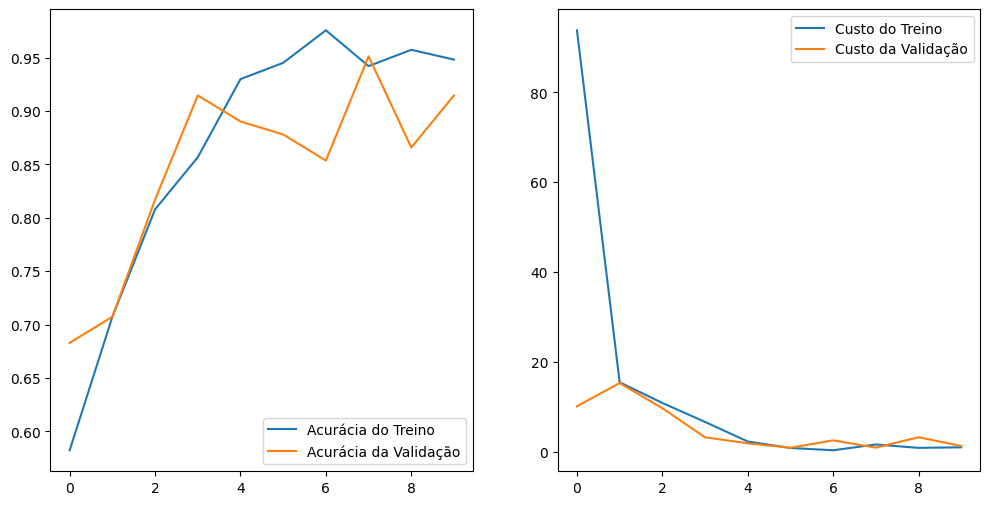

In [31]:
plota_resultados(history, epocas)

### Early stop

#### Parando o treino mais cedo

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.93):
      print("\n Alcançamos 93% de acurácia. Parando o treinamento!")
      self.model.stop_training = True

callbacks = myCallback()

#### Definindo camadas e compilando o modelo

In [33]:
modelo3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

modelo3.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

#### Treinando a rede

In [34]:
epocas = 10

history3 = modelo3.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

Epoch 1/10
6/6 [==============================] - 4s 381ms/step - loss: 15.0417 - accuracy: 0.4970 - val_loss: 6.5938 - val_accuracy: 0.5244
Epoch 2/10
6/6 [==============================] - 2s 265ms/step - loss: 3.4285 - accuracy: 0.5701 - val_loss: 0.8215 - val_accuracy: 0.4756
Epoch 3/10
6/6 [==============================] - 2s 255ms/step - loss: 0.6809 - accuracy: 0.5335 - val_loss: 0.5379 - val_accuracy: 0.8171
Epoch 4/10
6/6 [==============================] - 2s 252ms/step - loss: 0.4179 - accuracy: 0.8354 - val_loss: 0.3982 - val_accuracy: 0.8293
Epoch 5/10
6/6 [==============================] - 3s 493ms/step - loss: 0.2794 - accuracy: 0.8780 - val_loss: 0.2969 - val_accuracy: 0.9024
Epoch 6/10
5/6 [========================>.....] - ETA: 0s - loss: 0.1491 - accuracy: 0.9594
 Alcançamos 93% de acurácia. Parando o treinamento!
6/6 [==============================] - 2s 254ms/step - loss: 0.1474 - accuracy: 0.9604 - val_loss: 0.2436 - val_accuracy: 0.9146


### Data augmentation

#### Aumentando a diversidade do dataset



In [35]:
data_augmentation = tf.keras.Sequential()

In [36]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),
  ]
)

#### Adicionando a sequência à estrutura de camadas convolucionais


In [37]:
modelo4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(416, 416, 3)),
    # Add data augmentation
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

modelo4.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

#### Processo de treinamento

In [38]:
epocas = 10

history4 = modelo4.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/10
6/6 [==============================] - 6s 435ms/step - loss: 6.5271 - accuracy: 0.5854 - val_loss: 0.3846 - val_accuracy: 0.8415
Epoch 2/10
6/6 [==============================] - 4s 450ms/step - loss: 0.3669 - accuracy: 0.8537 - val_loss: 0.4542 - val_accuracy: 0.8049
Epoch 3/10
6/6 [==============================] - 3s 360ms/step - loss: 0.4022 - accuracy: 0.8201 - val_loss: 0.3047 - val_accuracy: 0.8537
Epoch 4/10
6/6 [==============================] - 2s 259ms/step - loss: 0.2890 - accuracy: 0.8902 - val_loss: 0.3227 - val_accuracy: 0.8293
Epoch 5/10
6/6 [==============================] - 2s 258ms/step - loss: 0.2505 - accuracy: 0.9024 - val_loss: 0.3172 - val_accuracy: 0.9024
Epoch 6/10
6/6 [==============================] - 2s 252ms/step - loss: 0.2490 - accuracy: 0.9055 - val_loss: 0.2946 - val_accuracy: 0.8537
Epoch 7/10
6/6 [==============================] - 3s 320ms/step - loss: 0.1937 - accuracy: 0.9207 - val_loss: 0.2375 - val_accuracy: 0.8902
Epoch 8/10
6/6 [====

#### Plotando os resultados

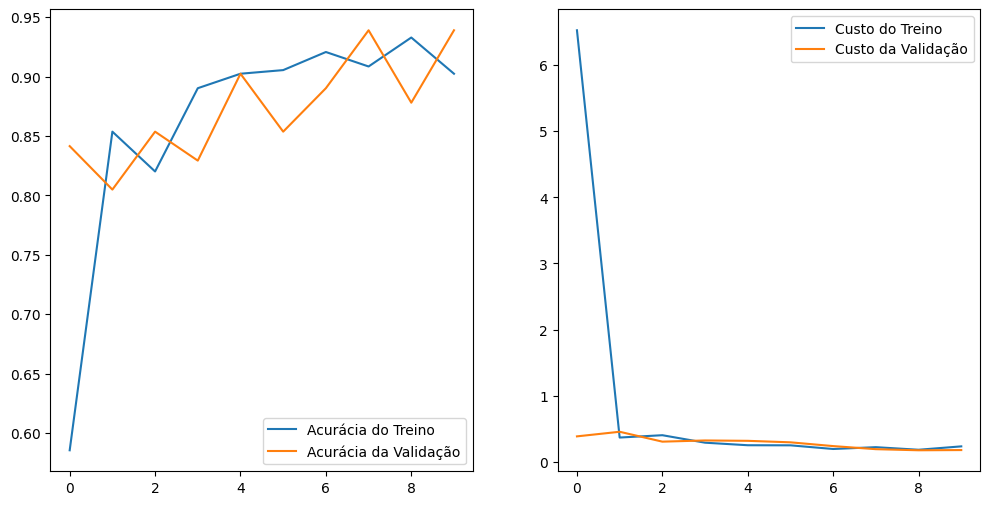

In [39]:
plota_resultados(history4, epocas)

#### Salvando o modelo

In [40]:
# modelo4.save('modelo_apos_aumento.h5')

## Aplicando Modelos Pré-Treinados

### Usando modelos pré-treinados

#### Baixando um modelo de identificação

In [41]:
input_shape =(416, 416, 3)

In [42]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 5s 0us/step


#### Conhecendo o novo modelo

In [43]:
modelo_base.trainable = False

In [44]:
modelo_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 207, 207, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d_6[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalizati

### Transferindo o aprendizado

#### Refazendo o rescaling

In [45]:
rescaling = tf.keras.layers.Rescaling(1./255)
treino = treino.map(lambda x, y: (rescaling(x), y))
validacao = validacao.map(lambda x, y: (rescaling(x), y))

#### Travando o InceptionV3

In [46]:
ultima_camada = modelo_base.get_layer('mixed7')
ultima_saida = ultima_camada.output

#### Construíndo o modelo

In [47]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

modelo5 = tf.keras.Model(inputs=modelo_base.input,outputs=x)

In [48]:
modelo5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 207, 207, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d_6[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalization[0][0

#### Compilando o modelo

In [49]:
modelo5.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = 'binary_crossentropy',
                    metrics=['accuracy'])

#### Treinando o modelo

In [51]:
epocas = 10

history5 = modelo5.fit (
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 17.4785 - accuracy: 0.5030 - val_loss: 4.4081 - val_accuracy: 0.5244
Epoch 2/10
6/6 [==============================] - 4s 623ms/step - loss: 7.1450 - accuracy: 0.4848 - val_loss: 1.2199 - val_accuracy: 0.4756
Epoch 3/10
6/6 [==============================] - 5s 697ms/step - loss: 4.2259 - accuracy: 0.5152 - val_loss: 0.7186 - val_accuracy: 0.4878
Epoch 4/10
6/6 [==============================] - 4s 600ms/step - loss: 0.7600 - accuracy: 0.5274 - val_loss: 0.6531 - val_accuracy: 0.5366
Epoch 5/10
6/6 [==============================] - 5s 703ms/step - loss: 3.8057 - accuracy: 0.5091 - val_loss: 0.6645 - val_accuracy: 0.5854
Epoch 6/10
6/6 [==============================] - 4s 581ms/step - loss: 1.7044 - accuracy: 0.5732 - val_loss: 0.7426 - val_accuracy: 0.4756
Epoch 7/10
6/6 [==============================] - 4s 682ms/step - loss: 0.8314 - accuracy: 0.4848 - val_loss: 0.6851 - val_accuracy: 0.5244
Epoch 8/10
6/6 [=====

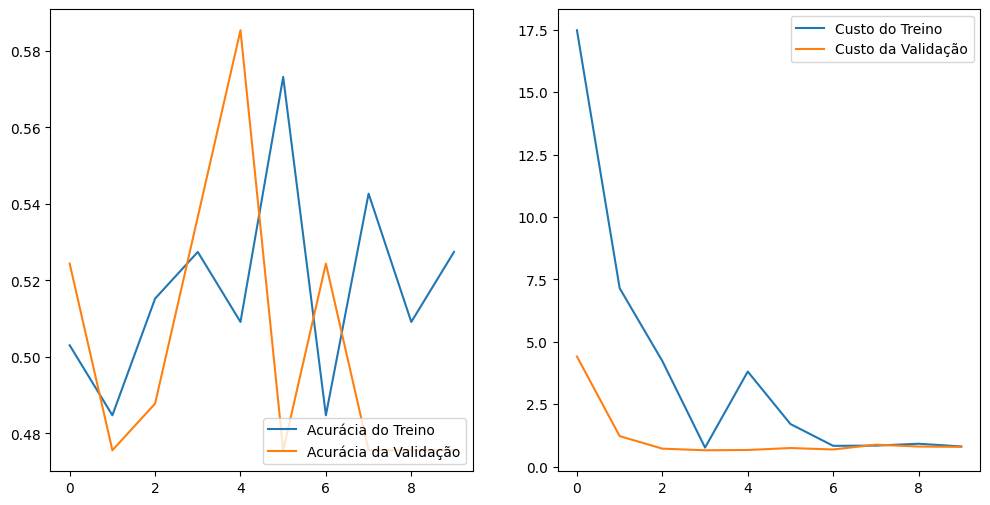

In [52]:
plota_resultados(history5, epocas)

### Salvando o modelo

In [61]:
# modelo5.save('modelo_transferencia_de_aprendizado.h5')

#### Salvando o modelo com tamanho otimizado

In [62]:
# modelo5.save('modelo_final_transferencia_de_aprendizado.h5', include_optimizer=False)

#### Salvando apenas os pesos

In [63]:
# modelo5.save_weights('pesos.h5')

#### Salvando com Tensorflow lite

In [64]:
# converter = tf.lite.TFLiteConverter.from_keras_model(modelo5)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

## quantização
#converter.target_spec.supported_types = [tf.float16]

#modelo_tflite_quantizado = converter.convert()

#with open('modelo_quantizado16bits.tflite', 'wb') as f:
#    f.write(modelo_tflite_quantizado)

## Produção

### Salvando o modelo para produção

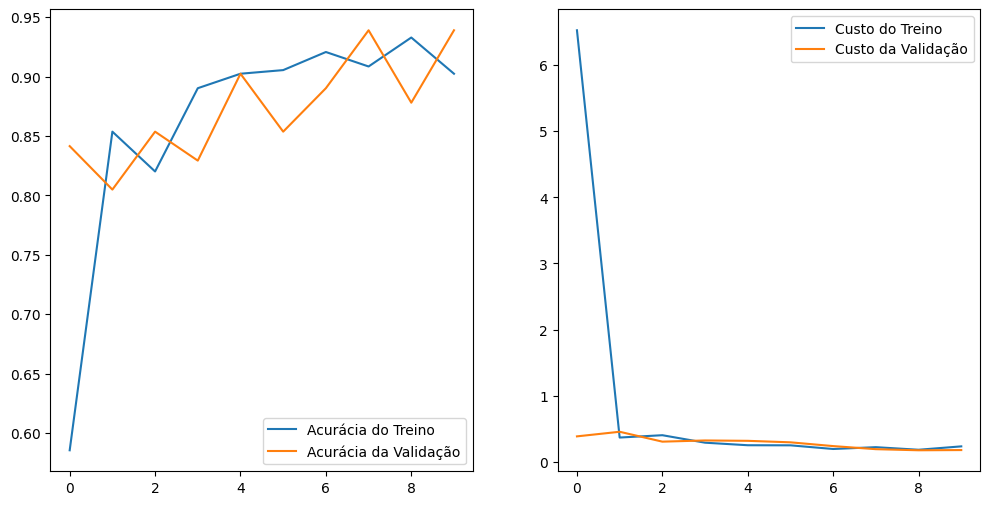

In [53]:
plota_resultados(history4, epocas)

In [55]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo4)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [56]:
# quantização
converter.target_spec.supported_types = [tf.float16]
modelo_tflite_quantizado = converter.convert()

In [59]:
drive_path = "/content/drive/MyDrive/modelo/modelo_quantizado16bits.tflite"

In [60]:
with open(drive_path, 'wb') as f:
  f.write(modelo_tflite_quantizado)